# Data science project in Python

Doormiddel van numpy, pandas, matplotlib & SciKit-learn

Door Louis D'Hont - Elektronica-ICT - 2021

## Project omschrijving

Het doel van deze opdracht is om op basis van bepaalde features het type klanten dat over gaat tot een nieuwe boeking te bepalen met een algoritme. Deze features zijn gehaald uit de hieronder beschreven data beschikbaar gesteld door TrailFinders. Ze organiseren paardrijvakanties over de hele wereld en helpen daarnaast ook om de vlucht, accomodatie, huurwagen, verzekeringen en dergelijke te regelen.

In [1]:
# Importeren van gebruikte bibliotheken
import datetime
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import dates as mpl_dates
from pandas.plotting import scatter_matrix

## Data analyse

### Inlezen van data en opschonen

Hieronder wordt de data die is aangeleverd ingelezen en omgezet naar een DataFrame.

In [2]:
klanten = pd.read_csv("../data/klanten.csv", sep=';') 
artikels = pd.read_csv("../data/artikels.csv", sep=';') 
bestellingen = pd.read_csv("../data/bestellingen.csv", sep=';') 
deelnemers = pd.read_csv("../data/deelnemers.csv", sep=';')

df_klanten = pd.DataFrame(klanten)
df_artikels = pd.DataFrame(artikels)
df_bestellingen = pd.DataFrame(bestellingen)
df_deelnemers = pd.DataFrame(deelnemers)

Hieronder wordt de data uit de dataframes opgeschoont en samengevoegd tot 1 dataframe met alle opgeschoonde kolommen.


### Data kwaliteit

- Enkele zaken die hieronder worden uitgevoerd:
 * Hernoemen van kolomnamen
 * Wijzigen van datatypes
 * Data in kolommen omzetten naar een uniforme manier
 * Samenvoegen van meerdere dataframes om ontbrekende waarden op te vullen
 * Plotten van data in grafieken
 * Verwijderen van enkele niet relevante kolommen
 
 
### Dataframe Klanten

Hieronder wordt het klanten dataframe gekopieërd naar het dataframe "df" dat zal dienen als basis.

In [3]:
df_klanten.drop(columns=['Straat + nr.', 'Klantnummer CMS', 'Telefoon', 'Email', 'Postcode', 'Locatie'], inplace=True)
df = df_klanten.copy()

df['Creatie datum'] = pd.to_datetime(df['Creatie datum'], format='%Y.%m.%d', infer_datetime_format=True, errors='coerce')
df.rename(columns={'Geb. datum': 'Geboortedatum'}, inplace = True)

df_bestellingen.rename(columns={'Land klant': 'Land', 'Geb. datum': 'Geboortedatum'}, inplace = True)

df

,Familienaam,Voornaam,Klantnummer,Creatie datum,Geboortedatum,Land
0,af5f4e99f49c3f2d,NaN,ac983a70783ec68a,2020-04-16,NaN,Belgium
1,daf9045a1aa9fb22,NaN,a2c2445dfea02d1c,2014-02-02,NaN,Belgium
2,613157e82ec0becf,NaN,2793b2960986ce2e,2011-12-30,NaN,Nederland
3,c01004eb9480c797,NaN,438097f68bf1969f,2012-03-19,NaN,Nederland
4,0b854cdcc8fcd3be,NaN,ec6e4fa0caea4e51,2012-02-14,NaN,Nederland
...,...,...,...,...,...,...
3306,a3c772a2068b64cb,9f2a07c17802c803,0c9726b68112728a,2017-08-08,NaN,Nederland
3307,5355a0d4f8f7aa4a,74eb6233766882cf,aa393e258363d27d,NaT,NaN,nederland
3308,a901d5cba911fc5f,3f03b49c46c6d1dc,b2c8419b8a9e1c57,NaT,NaN,Nederland
3309,ab1f7a0d47b995c5,af600d2d5a6a2f9e,56d28c901ad59627,NaT,NaN,nederland


In het onderstaande blok worden de landen omgevormd tot één waarde omdat er manueel op verschillende manieren landen zijn ingegeven die niet goed bruikbaar zijn voor een leermodel. Zo wordt België op diverse manieren geschreven zoals bijvoorbeeld: belgïe, begie, belgiê... en dit voor de meerderheid van de landen in de kolom. 
Om in een later stap de bestellingen samen te voegen met het dataframe "df" moeten alle landen omgevormd worden naar een eenvoudige schrijfwijze net zoals met het klanten dataframe. 

In [4]:
def wijzig_landen(df):
    namen_belgie = ['belgium', 'be', 'belgië', 'belgïe', 'west-vlaanderen', 'b', 'belgie', 'belg', 'begie', 'ybelgie', 'be', 'oost-vlaanderen - belgium', 'oost-vlaanderen', 'belgiê', 'beglië']
    namen_nederland = ['nl', 'nederand', 'nederlands', 'ned', 'nerdland', 'holland', 'netherland', 'groningen', 'noord holland', 'noord-brabant', 'hengelo ov', 'nederland', 'nederlandse', 'the netherlands', 'pays bas (holland)', 'nerderland', 'nld', 'ndl', 'ned.', 'utrecht', 'noor holland', 'noord-holland', 'netherlands', 'zuid-holland', 'nederkand', 'nedeland']
    namen_frankrijk = ['france', 'frankrijk']
    namen_duitsland = ['duitsland', 'germany']
    namen_verenigd_koninkrijk = ['groot-brittanie ', 'united kingdom']
    #namen_verwijderen = ['27', 'NaN', 'df', 'z', 'nan', 'Kies...', 'jelle', '- -', '-', 'test', '0633799726', 'Selecteer een staat', 'Selecteer een gebied, staat of provincie a.u.b.']

    for index, land in enumerate(df['Land']):
        #if str(land) in namen_verwijderen:
            #print(land)
        if (str(land).lower()) in namen_belgie:
            df.loc[index, 'Land'] = 'be'
        if (str(land).lower()) in namen_nederland:
            df.loc[index, 'Land'] = 'nl'
        if (str(land).lower()) in namen_frankrijk:
            df.loc[index, 'Land'] = 'fr'
        if (str(land).lower()) in namen_duitsland:
            df.loc[index, 'Land'] = 'de'
        if (str(land).lower()) in namen_verenigd_koninkrijk:
            df.loc[index, 'Land'] = 'gb'
        if (str(land).lower()) == 'luxemburg':
            df.loc[index, 'Land'] = 'lux'
        if (str(land).lower()) == 'scotland':
            df.loc[index, 'Land'] = 'sco'
        if (str(land).lower()) == 'portugal':
            df.loc[index, 'Land'] = 'pt'
        if (str(land).lower()) == 'suriname':
            df.loc[index, 'Land'] = 'sr'
        if (str(land).lower()) == 'hong kong':
            df.loc[index, 'Land'] = 'cn'
        if (str(land).lower()) == 'oostenrijk':
            df.loc[index, 'Land'] = 'aut'
        if (str(land).lower()) == 'canada':
            df.loc[index, 'Land'] = 'ca'
        if (str(land).lower()) == 'italy':
            df.loc[index, 'Land'] = 'it'
        if (str(land).lower()) == 'spanje':
            df.loc[index, 'Land'] = 'es'
        if (str(land).lower()) == 'chile':
            df.loc[index, 'Land'] = 'cl'
            
    # dit stuk moet korter worden geschreven
    # Array overaan (namen_verwijderen) werkte niet
    df.drop(df.index[df['Land'] == 'NaN'], inplace = True)
    df.drop(df.index[df['Land'].isnull()], inplace = True)
    df.drop(df.index[df['Land'] == 'df'], inplace = True)
    df.drop(df.index[df['Land'] == '27'], inplace = True)
    df.drop(df.index[df['Land'] == 'z'], inplace = True)
    df.drop(df.index[df['Land'] == 'Kies...'], inplace = True)
    df.drop(df.index[df['Land'] == 'jelle'], inplace = True)
    df.drop(df.index[df['Land'] == '- -'], inplace = True)
    df.drop(df.index[df['Land'] == '-'], inplace = True)
    df.drop(df.index[df['Land'] == 'test'], inplace = True)
    df.drop(df.index[df['Land'] == '0633799726'], inplace = True)
    df.drop(df.index[df['Land'] == 'Selecteer een staat'], inplace = True)
    df.drop(df.index[df['Land'] == 'Selecteer een gebied, staat of provincie a.u.b.'], inplace = True)

wijzig_landen(df)
wijzig_landen(df_bestellingen)

print("Alle unique waarden in de landen lijst: " + str(df.Land.unique()))
print("Aantal rijen en kolommen: " + str(df.shape))

Alle unique waarden in de landen lijst: ['be' 'nl' 'it' 'ca' 'gb' 'cn' 'de' 'sco' 'aut' 'fr' 'cl' 'sr' 'es' 'lux'
 'pt']
Aantal rijen en kolommen: (3298, 6)


De onderstaande lijst toon het datatype voor elke kolomnaam met het aantal ingevulde waarden.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3298 entries, 0 to 3310
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Familienaam    3294 non-null   object        
 1   Voornaam       3260 non-null   object        
 2   Klantnummer    3298 non-null   object        
 3   Creatie datum  1859 non-null   datetime64[ns]
 4   Geboortedatum  1341 non-null   object        
 5   Land           3298 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 180.4+ KB


#### Grafiek klanten per land

In de onderstaande grafiek wordt er weergegeven welke 3 landen het meeste aantal klanten bevat, samen met het percentage. Verder in het opschonen van de data worden de landen die geen waarde hebben voor het land geïdentificeerd als Nederland (nl) omdat we er kunnen vanuit gaan dat zij bij de meerderheid van de 71% Nederlanders behoren. Verder volgt België met ongeveer 29% van het klantenbestand. De andere landen komen zeer zelfden voor (1-10 keer in de data).

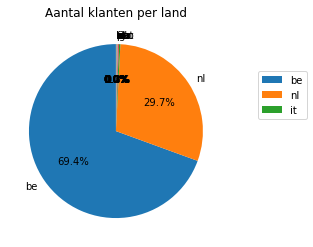

Aantal klanten per land: 
nl     2290
be      981
de        9
fr        5
it        2
gb        2
cl        1
sr        1
pt        1
sco       1
cn        1
ca        1
lux       1
aut       1
es        1
Name: Land, dtype: int64


In [6]:
labels = df.Land.unique()
plt.pie(df['Land'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Aantal klanten per land')
plt.legend(labels[:3], loc='upper right', bbox_to_anchor=(1.4, 0.8))
plt.show();
print("Aantal klanten per land: \n" + str(df['Land'].value_counts()));

### Dataframe Deelnemers

Hieronder wordt het deelnemers dataframe samengevoegd in een dataframe genaamd "df" waarin al klanteninformatie aanwezig is. Er wordt gemerged op basis van de voornaam, familienaam en geboortedatum. De merge zal lege waarden in de kolommen automatisch opvullen met coresponderende data dat aanwezig is in het dataframe waarmee wordt gemerged.

De niet relevante informatie (kolommen) worden verwijderd. De vertrekdatum wordt omgezet tot een datetime64 type om later te kunnen gebruiken en om te zetten. Door het type te veranderen wordt de formattering ook gewijzigd naar 'yyyy-mm-dd'

In [7]:
df = df.merge(df_deelnemers, left_on=['Familienaam', 'Voornaam', 'Geboortedatum'], right_on=['Familienaam', 'Voornaam', 'Geboortedatum'], how='inner')
df.drop(columns=['Straat + nr.', 'GSM', 'Voornaam', 'Familienaam', 'Email', 'GSM', 'Postcode', 'Stad'], inplace=True)

df['Vertrekdatum'] = pd.to_datetime(df['Vertrekdatum'], format='%Y.%m.%d', infer_datetime_format=True, errors='coerce')

df

,Klantnummer,Creatie datum,Geboortedatum,Land,Dossier,Vertrekdatum,Bestemming
0,6c231fcb70c72e00,2018-06-08,NaN,nl,3901,NaT,Nederland
1,f70addd191c2c2c6,2014-01-08,01.09.1982,be,1560,2014-08-18,Sardinie Italie
2,411bce82cad7cc8d,2018-08-30,NaN,be,3932,NaT,NaN
3,0e250e79fee0e3aa,2012-05-20,28.09.1961,nl,489,2012-07-21,Big Five Safari Zuid Afrika
4,e13f2cf348c9fb33,2012-12-03,26.01.1990,nl,348,2012-08-24,Duitsland
...,...,...,...,...,...,...,...
1967,1b98cb525181af64,NaT,NaN,be,2276,2016-09-17,Andalusie Spanje
1968,1b98cb525181af64,NaT,NaN,be,3444,2018-04-22,Spanje
1969,56d28c901ad59627,NaT,NaN,nl,1338,2014-04-27,Cappadocie Turkije
1970,56d28c901ad59627,NaT,NaN,nl,1623,2014-10-18,Molise Italie


De onderstaande lijst toon het datatype voor elke kolomnaam.

In [8]:
df.dtypes

Klantnummer              object
Creatie datum    datetime64[ns]
Geboortedatum            object
Land                     object
Dossier                   int64
Vertrekdatum     datetime64[ns]
Bestemming               object
dtype: object

### Dataframe bestellingen

In het onderstaande codeblok worden de niet relevante kolommen verwijderd en enkele kolommen hernoemd.
Hierna worden de lege waarden in het dossier nummer verwijderd en wordt het datatype omgezet naar een integer.
Het dossier jaar en het dossier nummer in het bestellingen dataframe worden hierna ook verwijderd wanneer deze leeg zijn.

Alle dossiernummers die leeg zijn worden verwijderd in het bestellingen dataframe, hierna wordt het dataframe samengevoegd op basis van het dossier nummer en het klanten nummer.

Als laatste worden de datatypes van enkele kolommen gewijzigd zodat deze later mogelijks kunnen worden gebruikt.
De kolom "Aantal dagen tot vertrek" bevat het aantal aantal dagen en of uren, minuten en seconden tussen het aanmaken van een account en het vertrek. De kolom "Aantal dagen op reis" bevat het aantal dagen dat de reis duurde. Er viel mij op dat enkele verschillen zeer groot (82 dagen of meer) zijn wat mij doet vermoeden dat er foutieve data is ingegeven.

Ook is het verschil tussen het aanmaken van het dossier en het vertrekken op reis vaak negatief wat erop wijst dat de ingegeven data niet klopt voor enkele reizen.
Om vreemde gevallen te verwijderen worden ook reizen die een vertrek datum van 2022 of hoger hebben verwijderd alsook de reizen onder 2011, zo blijft de dataset binnen de randen van de grote hoeveelheid data.

In [9]:
df_bestellingen.drop(columns=['Regio', 'Klantnummer CMS', 'Email'], inplace=True)
df_bestellingen.rename(columns={'# pass.': 'Aantal reizigers', 'Dos. nr.': 'Dossier nr.', 'Dos. jaar': 'Dossier jaar', 'D. vertrek': 'Datum vertrek'}, inplace = True)

now = datetime.datetime.now()
df_bestellingen['Dossier jaar'].fillna(now.year)
df_bestellingen.drop(df_bestellingen.index[df_bestellingen['Dossier jaar'].isnull()], inplace = True)
df_bestellingen['Dossier jaar'] = df_bestellingen['Dossier jaar'].astype(int)

df_bestellingen['Dossier nr.'].fillna(0)
df_bestellingen.drop(df_bestellingen.index[df_bestellingen['Dossier nr.'].isnull()], inplace = True)
df_bestellingen['Dossier nr.'] = df_bestellingen['Dossier nr.'].astype(int)

df_bestellingen['Status'] = df_bestellingen['Status'].astype(int)
df_bestellingen['Dossier nr.'] = df_bestellingen['Dossier nr.'].astype(int)

df_bestellingen['Totaalprijs'] = df_bestellingen['Totaalprijs'].replace(',', '.', regex=True)
df_bestellingen['Totaalprijs'] = df_bestellingen['Totaalprijs'].astype(float)

df_bestellingen['Betalingen dossier'] = df_bestellingen['Betalingen dossier'].replace(',', '.', regex=True)
df_bestellingen['Betalingen dossier'] = df_bestellingen['Betalingen dossier'].astype(float)

df_bestellingen['Openstaand dossier'] = df_bestellingen['Openstaand dossier'].replace(',', '.', regex=True)
df_bestellingen['Openstaand dossier'] = df_bestellingen['Openstaand dossier'].astype(float)

for index, row in df_bestellingen.iterrows():
    if (row['Aantal reizigers'] == 0.0):
        df_bestellingen.loc[index, 'Aantal reizigers'] = 1
    # Wijzigen van de status 0 en -1 worden 1 en 0
    if(row['Status'] == 0):
        df_bestellingen.loc[index, 'Status'] = 1
    if(row['Status'] == -1):
        df_bestellingen.loc[index, 'Status'] = 0

#df_bestellingen['Aantal reizigers'].fillna(1)
#df_bestellingen['Aantal reizigers'] = df_bestellingen['Aantal reizigers'].astype(int)

df_bestellingen['Datum creatie'] = pd.to_datetime(df_bestellingen['Datum creatie'], format='%Y.%m.%d', infer_datetime_format=True, errors='coerce')
df_bestellingen['Datum vertrek'] = pd.to_datetime(df_bestellingen['Datum vertrek'], format='%Y.%m.%d', infer_datetime_format=True, errors='coerce')
df_bestellingen['Datum terug'] = pd.to_datetime(df_bestellingen['Datum terug'], format='%Y.%m.%d', infer_datetime_format=True, errors='coerce')

df_bestellingen['Aantal dagen tot vertrek'] = abs(df_bestellingen['Datum creatie'] - df_bestellingen['Datum vertrek'])
df_bestellingen['Aantal dagen op reis'] = abs(df_bestellingen['Datum terug'] - df_bestellingen['Datum vertrek'])

df_bestellingen.drop(df_bestellingen.index[df_bestellingen['Datum vertrek'].dt.year > now.year], inplace = True)
df_bestellingen.drop(df_bestellingen.index[df_bestellingen['Datum terug'].dt.year > now.year], inplace = True)

df_bestellingen.drop(df_bestellingen.index[df_bestellingen['Datum vertrek'].dt.year < 2012], inplace = True)
df_bestellingen.drop(df_bestellingen.index[df_bestellingen['Datum terug'].dt.year < 2012], inplace = True)

df_bestellingen.drop(df_bestellingen.index[df_bestellingen['Datum vertrek'].isnull()], inplace = True)
df_bestellingen.drop(df_bestellingen.index[df_bestellingen['Datum terug'].isnull()], inplace = True)

df_bestellingen

,Status,Dossier jaar,Dossier nr.,Klantnummer,Datum creatie,Datum vertrek,Datum terug,Totaalprijs,Betalingen dossier,Openstaand dossier,Touroperator,Land,Bestemming,Reistype,Aantal reizigers,Pakket Code,Gefactureerd,Aantal dagen tot vertrek,Aantal dagen op reis
0,0,2021,0,e7a25456cafdac84,2021-04-01 15:11:00,2021-11-09,2021-09-18,0.00,0.00,0.0,c723acdbab5e366e,nl,Spanje,NaN,1.0,ESOVFIHEXP,False,221 days 08:49:00,52 days
152,1,2011,189,030abd64a9a637e5,2011-10-21 12:48:33,2012-04-27,2012-04-29,1600.00,1600.00,0.0,dd01e280a02b1235,nl,Drents Friese Woud Drenthe,NaN,6.0,NaN,False,188 days 11:11:27,2 days
153,1,2011,190,030abd64a9a637e5,2011-10-21 12:56:19,2012-04-27,2012-04-29,1600.00,1600.00,0.0,dd01e280a02b1235,nl,Drents Friese Woud Drenthe,NaN,6.0,NaN,True,188 days 11:03:41,2 days
154,1,2011,191,0517092b51559410,2011-10-26 11:34:16,2012-04-30,2012-04-05,941.66,941.66,0.0,0d646d6c024cd6a0,nl,Duitsland,NaN,2.0,NaN,True,186 days 12:25:44,25 days
155,1,2011,192,b931980e4256363a,2011-10-26 15:36:35,2012-06-29,2012-11-07,7201.50,7201.50,0.0,2409fd76d2abd722,nl,Ijsland,NaN,3.0,NaN,True,246 days 08:23:25,131 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4423,1,2021,20210063,987976e947ed0146,2021-05-22 14:02:13,2021-04-08,2021-06-08,335.00,0.00,335.0,3124a9d2236ff8eb,nl,Nederland,Weekendje weg,1.0,NLMALW9P,False,44 days 14:02:13,61 days
4424,1,2021,20210064,48261055dcd91db8,2021-05-22 19:52:22,2021-08-08,2021-08-15,1020.00,0.00,1020.0,d5b44b89737b542f,be,Frankrijk,Ruitervakantie,2.0,FRDOFJVP,False,77 days 04:07:38,7 days
4425,1,2021,20210065,2c3513ff809c5027,2021-05-23 16:02:09,2021-08-08,2021-12-08,760.00,0.00,760.0,27ef3947de4c44d2,nl,Nederland,Weekendje weg,2.0,NLSTWPAP,False,76 days 07:57:51,122 days
4426,0,2021,20210066,b1e8b8eaac7784a6,2021-05-23 19:07:14,2021-01-08,2021-08-08,1076.10,0.00,1076.1,d5b44b89737b542f,nl,Frankrijk,NaN,2.0,FRDOFJVP,False,135 days 19:07:14,212 days


#### Grafiek aantal dagen op reis

In het onderstaande cirkeldiagram wordt de reisduur procentueel weergegeven. Hieruit kunnen we concluderen dat de meerderheid van de reizen ongeveer 7 dagen duurden en er ook heel wat 2 daagse reizen waren geboekt.  

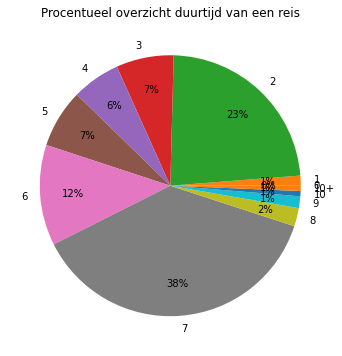

In [10]:
aantal_per_dag = df_bestellingen[df_bestellingen['Status'] == 1]['Aantal dagen op reis'].value_counts().sort_index()
aantal_per_dag.index = aantal_per_dag.index.map(lambda l:l.days)
aantal_per_dag = aantal_per_dag.loc[:10]
aantal_per_dag.loc['10+'] = aantal_per_dag.loc[10:].sum()

aantal_per_dag.plot.pie(subplots=True, pctdistance=0.75, autopct='%1.f%%', figsize=(6,6))
plt.axis('off')
plt.title("Procentueel overzicht duurtijd van een reis")
plt.show();

#### Grafiek Dossier jaar

In deze grafiek worden het aantal dossiers weergegeven per jaar. Zo is er duidelijk een dalende trapsgewijze daling jaar na jaar. Tussen 2016 en 2019 waren de meeste reizen geboekt. Nu recent sinds 2020 zijn er heel wat minder reizen geboekt omdat in dat jaar de coronacrisis uitbrak en er wereldwijd naar heel wat landen een reisverbod gelde.

Aantal reizen per jaar: 
2017    610
2016    597
2018    596
2013    571
2019    500
2015    403
2012    317
2020    307
2014    216
2021     66
2011     27
Name: Dossier jaar, dtype: int64


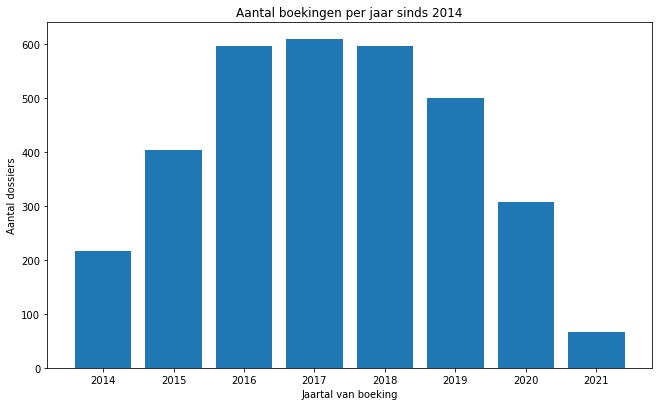

In [11]:
print('Aantal reizen per jaar: \n' + str(df_bestellingen['Dossier jaar'].value_counts()))

dos_jaar = df_bestellingen['Dossier jaar'].value_counts()

data = {'Jaar': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], 'Aantal dossiers': [dos_jaar[2014],dos_jaar[2015],dos_jaar[2016],dos_jaar[2017],dos_jaar[2018],dos_jaar[2019],dos_jaar[2020],dos_jaar[2021]]}

fig = plt.figure()
ax = fig.add_axes([0,0,1.4,1.2])
ax.bar(data['Jaar'], data['Aantal dossiers'])
ax.set_title('Aantal boekingen per jaar sinds 2014')
ax.set_xlabel('Jaartal van boeking')
ax.set_ylabel('Aantal dossiers')
plt.show();

#### Grafiek aantal medereizigers

Het aantal medereizigers die mee gaan op reis is te zien in de onderstaande grafiek. Het valt op dat de meeste reizen het vaakst alleen gebeuren (1 persoon) en daarop volgt een reis met 6 personen. Een minderheid gaat dan weer op reis met 3 of meerdere mensen, het maximale aantal medereizigers is 9, wat kan worden afgelezen uit de grafiek.

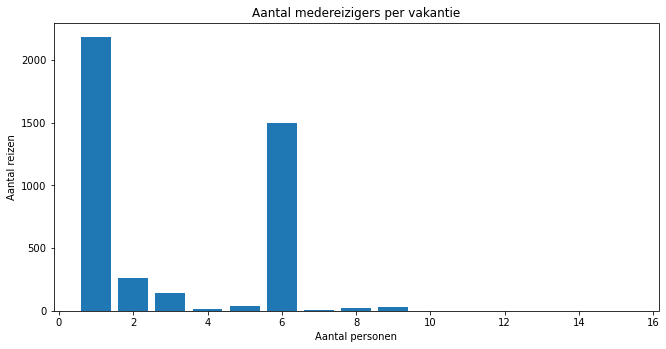

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.4,1])

labels = df_bestellingen['Aantal reizigers'].unique()
reizigers = df_bestellingen['Aantal reizigers'].value_counts()
plt.bar(labels, reizigers)

plt.title('Aantal medereizigers per vakantie')
plt.xlabel("Aantal personen")
plt.ylabel("Aantal reizen")

plt.show();

#### Opschonen dataframe

Het samenvoegen van het bestellingen dataframe met het samengevoegde dataframe "df" wordt gedaan op basis van het klantennummer en het dossiernummer.
Na het samenvoegen wordt het datatype voor de kolom "Aantal reizigers" gewijzigd naar een integer.

De kolom "Reistype" bevat voor het grootste deel de waarde "Ruitervakantie", omdat het om paardrijvakanties gaat worden alle NaN's vervangen door "Ruitervakantie". Alle vakanties waarbij de totaal prijs 0€ bedraagt werden ook verwijderd omdat deze waarschijnlijk geen vakantie hebben geboekt.

In [13]:
df['Dossier'].fillna(0)
df.drop(df.index[df['Dossier'].isnull()], inplace = True)
df['Dossier'] = df['Dossier'].astype(int)

df = df_bestellingen.merge(df, left_on=['Klantnummer', 'Dossier nr.'], right_on=['Klantnummer', 'Dossier'], how='left')

df.drop(columns=['Bestemming_y', 'Vertrekdatum', 'Dossier', 'Land_y', 'Gefactureerd', 'Creatie datum', 'Touroperator', 'Pakket Code'], inplace=True)
df.rename(columns={'Bestemming_x': 'Bestemming', 'Land_x': 'Land'}, inplace = True)

#df.drop_duplicates(subset ="Klantnummer", keep = False, inplace = True)

df.drop(df.index[df['Totaalprijs'] == 0.0], inplace = True)

df['Aantal reizigers'] = df['Aantal reizigers'].astype(int)
df['Reistype'] = df['Reistype'].fillna('Ruitervakantie')

Het dataframe bevat nu nog 3965 rijen aan data. Hieronder wordt een lijst weergegeven van het aantal lege waarden per kolom.

In [14]:
df.isnull().sum()

Status                         0
Dossier jaar                   0
Dossier nr.                    0
Klantnummer                    0
Datum creatie                  0
Datum vertrek                  0
Datum terug                    0
Totaalprijs                    0
Betalingen dossier             0
Openstaand dossier             0
Land                           0
Bestemming                    22
Reistype                       0
Aantal reizigers               0
Aantal dagen tot vertrek       0
Aantal dagen op reis           0
Geboortedatum               2556
dtype: int64

De onderstaande lijst toont het type voor elke kolom.

In [15]:
df.dtypes

Status                                int64
Dossier jaar                          int64
Dossier nr.                           int64
Klantnummer                          object
Datum creatie                datetime64[ns]
Datum vertrek                datetime64[ns]
Datum terug                  datetime64[ns]
Totaalprijs                         float64
Betalingen dossier                  float64
Openstaand dossier                  float64
Land                                 object
Bestemming                           object
Reistype                             object
Aantal reizigers                      int64
Aantal dagen tot vertrek    timedelta64[ns]
Aantal dagen op reis        timedelta64[ns]
Geboortedatum                        object
dtype: object

De overblijvende kolommen zijn hieronder weergegeven waarvan enkele kolommen interessant zijn om te gebruiken als feature.

In [16]:
df.columns

Index(['Status', 'Dossier jaar', 'Dossier nr.', 'Klantnummer', 'Datum creatie',
       'Datum vertrek', 'Datum terug', 'Totaalprijs', 'Betalingen dossier',
       'Openstaand dossier', 'Land', 'Bestemming', 'Reistype',
       'Aantal reizigers', 'Aantal dagen tot vertrek', 'Aantal dagen op reis',
       'Geboortedatum'],
      dtype='object')

# Evalueren en selecteren van features

Enkele interessante features die in de data te vinden zijn:

 - **Status**: De status (1 of 0) heeft aan of de boeking bevestigd of geannuleerd is.
 - **Dossier jaar**: Het jaar waarin het dossier werdt aangemaakt.
 - **Dossier nr.**: Een nummer (id) dat iedere reis identificeert.
 - **Klantnummer**: Het nummer dat een klant identificeert.
 - **Datum creatie**: Deze feature heeft een datum met uur, minuten en seconden. Deze waardes kunnen interessant zijn om te kijken hoeveel tijd er tussen een boeking en de reis vertrek datum zit.
 - **Datum vertrek**: De datum waarop een reis start.
 - **Datum terug**: De datum waarop de reizigers terugkeren naar hun thuisland.
 - **Totaalprijs**: De prijs die ze in totaal betalen voor de reis.
 - **Betalingen dossier**: Het bedrag dat al betaald is.
 - **Openstaand dossier**: Het bedrag dat nog moet betaald worden om te kunnen voldoen en te mogen vertrekken op reis.
 - **Land**: Het thuisland van de reiziger.
 - **Bestemming**: Het land waar de reiziger naartoe geweest is.
 - **Reistype**: Spreekt voor zichzelf.
 - **Aantal reizigers**: Het aantal personen die mee opreis gaan.
 - **Aantal dagen tot vertrek**: Het berekende aantal dagen (tijd) tussen het aanmaken van een account en de vertrek datum.
 - **Aantal dagen op reis**: Het berekende aantal dagen dat de reis duurde.

### Opslaan van features als csv

Wegschrijven van features naar csv bestand

In [17]:
df.to_csv('featuresDataFrame.csv')